# Fashion MNIST Classification

This is my first machine learning project where I build and train a neural network to classify images of clothing items from the Fashion MNIST dataset.

The goal is to demonstrate basic understanding of:
- loading and exploring a dataset,
- preprocessing and normalizing data,
- training a neural network using Keras,
- evaluating its performance,
- visualizing errors and interpreting results.

>Technologies used: Python, TensorFlow, keras, scikit-learn, Matolotlib

---

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Fashion MNIST

The **Fashion MNIST** dataset is a collection of 70,000 grayscale images of fashion products from 10 categories.  
Each image is 28x28 pixels, and each belongs to one of the following classes:

1. T-shirt/top  
2. Trouser  
3. Pullover  
4. Dress  
5. Coat  
6. Sandal  
7. Shirt  
8. Sneaker  
9. Bag  
10. Ankle boot

The dataset is split into:
- **60,000 training examples**
- **10,000 test examples**

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


We also define readable class names for later visualization.

In [4]:
class_names = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

print(f"Training set shape: {train_images.shape}")
print(f"Test set shape: {test_images.shape}")

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


### Data Exploration & Visualization

Before training a model, it's important to understand the data visually.
Here, we display the first 10 images in the training set along with their labels.

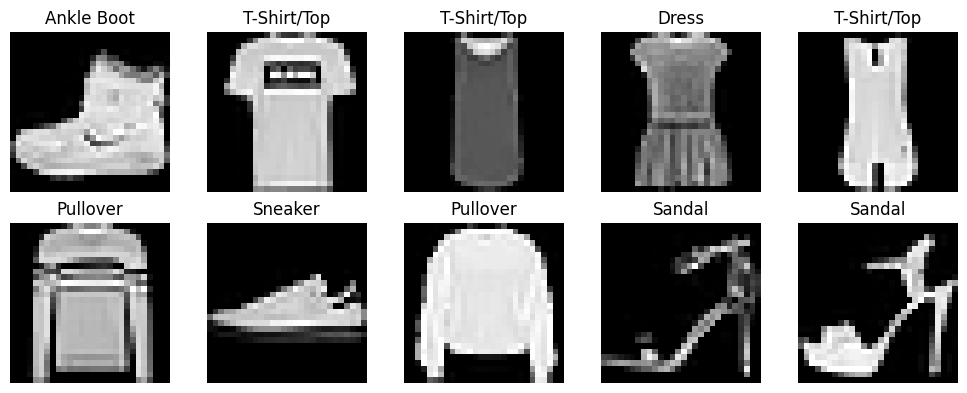

In [5]:
plt.figure(figsize=(10,4))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(train_images[i], cmap="gray")
  plt.title(class_names[train_labels[i]])
  plt.axis("off")
plt.tight_layout()
plt.show()

### Data Preprocessing

Pixel values range from 0 to 255.  
We normalize them to the [0, 1] range so the model trains faster and better.

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Building the Model

We use a simple Sequential model:
- Flatten input image from 28x28 into a 784-length vector
- One hidden Dense layer with 128 neurons and ReLU activation
- Output layer with 10 neurons (one per class) and softmax activation

In [7]:
model = keras.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
])

## 6. Compiling and Training the Model

We use:
- `Adam` optimizer (good default choice)
- `Sparse Categorical Crossentropy` as the loss function for multi-class classification
- `Accuracy` as the evaluation metric

We also use `validation_split=0.2` to monitor how well the model generalizes during training.

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7786 - loss: 0.6476 - val_accuracy: 0.8390 - val_loss: 0.4550
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8586 - loss: 0.3989 - val_accuracy: 0.8603 - val_loss: 0.3874
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8713 - loss: 0.3523 - val_accuracy: 0.8758 - val_loss: 0.3413
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8837 - loss: 0.3223 - val_accuracy: 0.8692 - val_loss: 0.3542
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8895 - loss: 0.3004 - val_accuracy: 0.8683 - val_loss: 0.3554
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8930 - loss: 0.2887 - val_accuracy: 0.8765 - val_loss: 0.3628
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8986 - loss: 0.2715 - val_accuracy: 0.8661 - val_loss: 0.3715
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9033 - loss: 0.2591 -

### Visualizing Training History

Let's see how accuracy changed over time for both training and validation sets.



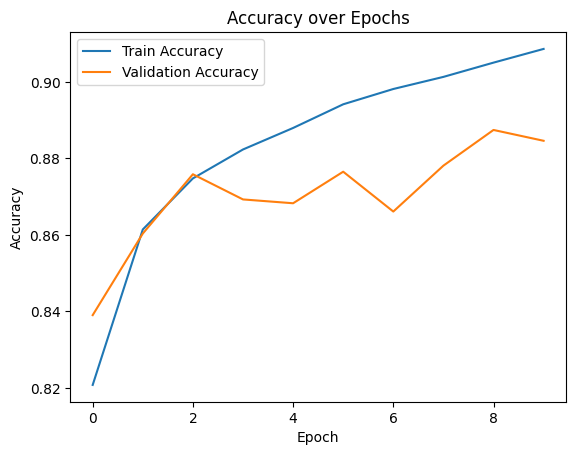

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Model Evaluation

After training, we evaluate the model on completely unseen data.

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8779 - loss: 0.3449
Test Accuracy: 0.88


### Confusion Matrix

The confusion matrix gives insight into which classes are being confused the most.
This helps identify weaknesses in the model's predictions.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


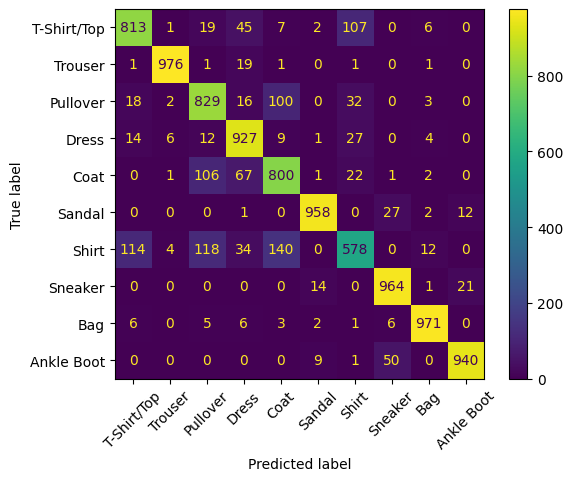

In [12]:
pred_probs = model.predict(test_images)
pred_labels = np.argmax(pred_probs, axis=1)

cm = confusion_matrix(test_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45)
plt.show()

### Visualizing Misclassifications

We show a few examples where the model predicted incorrectly.  
This helps us understand which items are commonly misclassified and why.

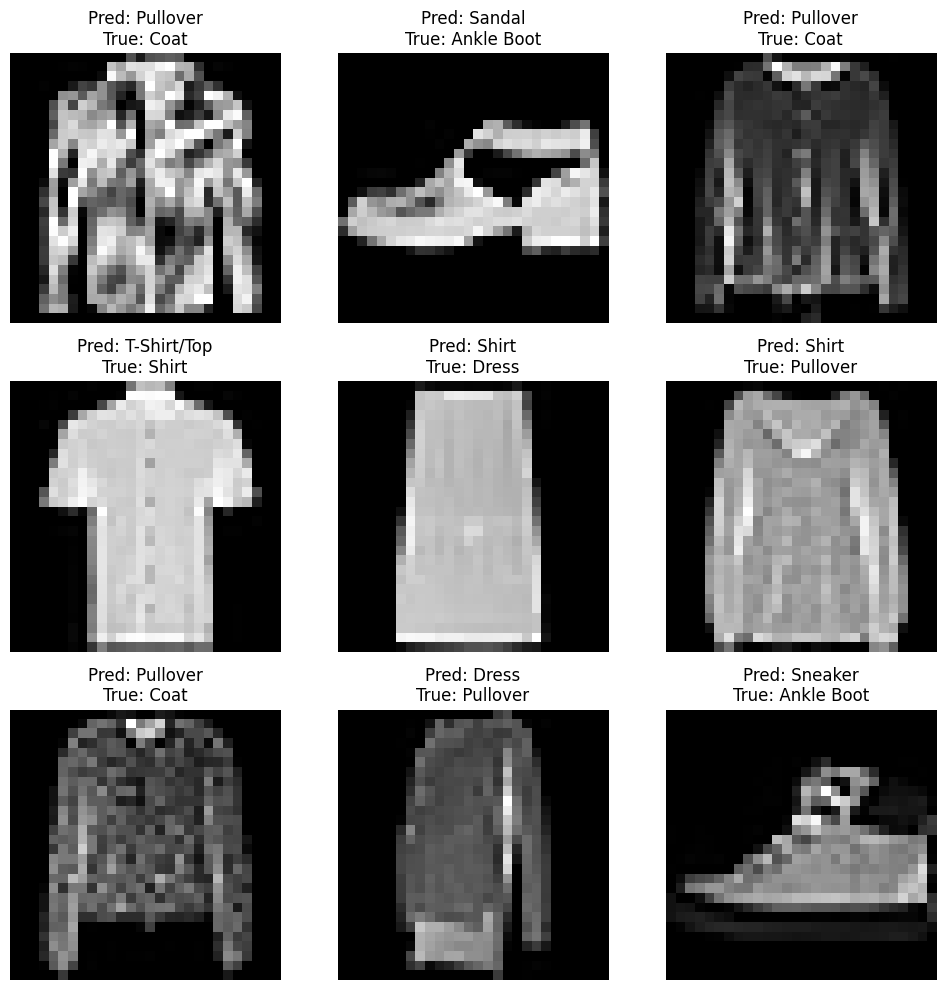

In [13]:
missclassified = np.where(pred_labels != test_labels)[0]

plt.figure(figsize=(10,10))
for i, idx in enumerate(missclassified[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(test_images[idx], cmap='gray')
  plt.title(f"Pred: {class_names[pred_labels[idx]]}\nTrue: {class_names[test_labels[idx]]}")
  plt.axis("off")
plt.tight_layout()
plt.show()

## Conclusion

This simple neural network achieved an accuracy of around 88% on the test set.  
Most confusion happened between visually similar classes such as *Shirt* vs *T-Shirt*.  
Using more advanced architectures like Convolutional Neural Networks (CNNs) could further improve the results.

### What I Learned
- Understanding dataset structure and normalization
- Training and evaluating a basic neural network
- Visualizing model performance
- The importance of error analysis in ML

This project marks the beginning of my journey in data science and machine learning 🚀